In [35]:
#import libraries
from sklearn.datasets import load_boston # dataset
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.stats.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import statsmodels as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
import seaborn as sns

%matplotlib inline

In [38]:
# instantiate dataset and create DataFrame 
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])

In [47]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [39]:
full_data = pd.concat([df,target],axis = 1)

/Users/uday/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/uday/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/uday/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/uday/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, 

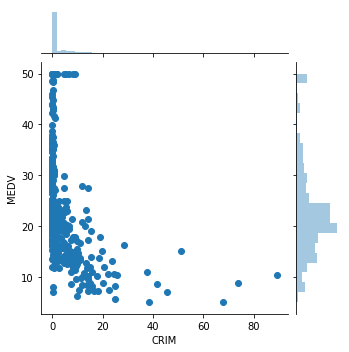

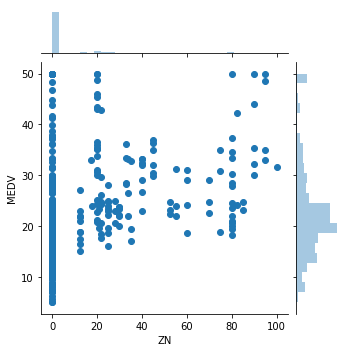

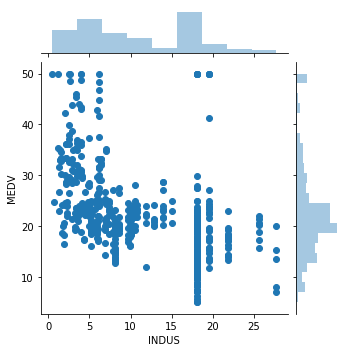

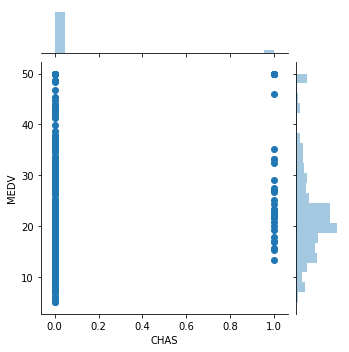

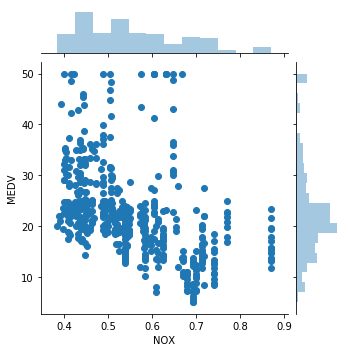

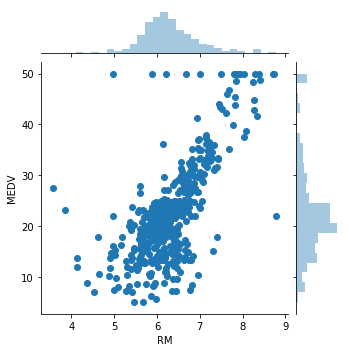

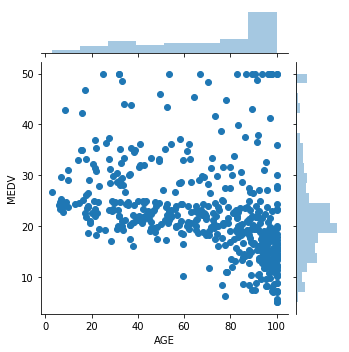

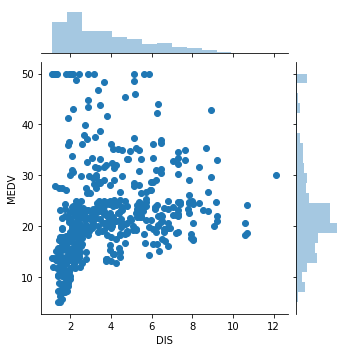

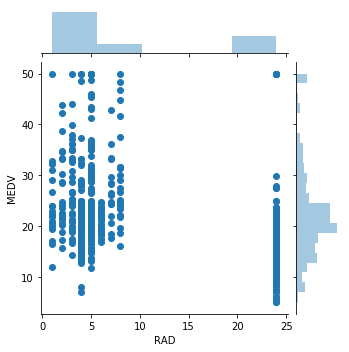

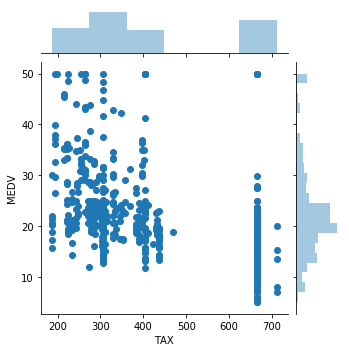

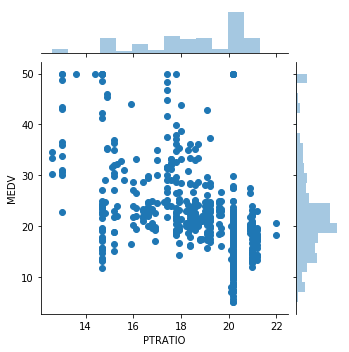

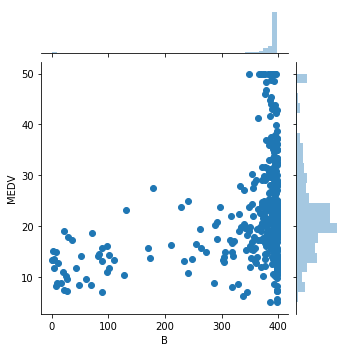

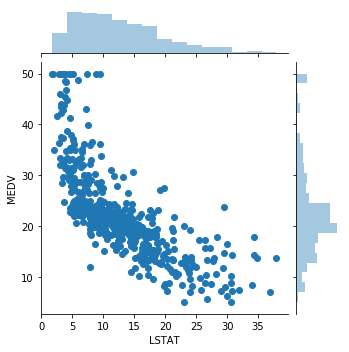

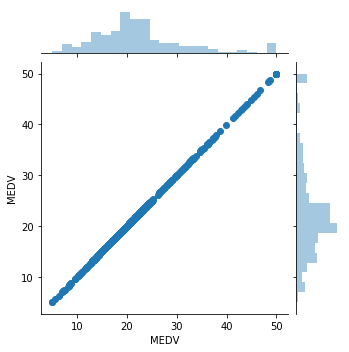

In [46]:
def print_allpairs():
    for i in full_data:
        sns.jointplot(x=i,y="MEDV",data=full_data, size=5)
print_allpairs()

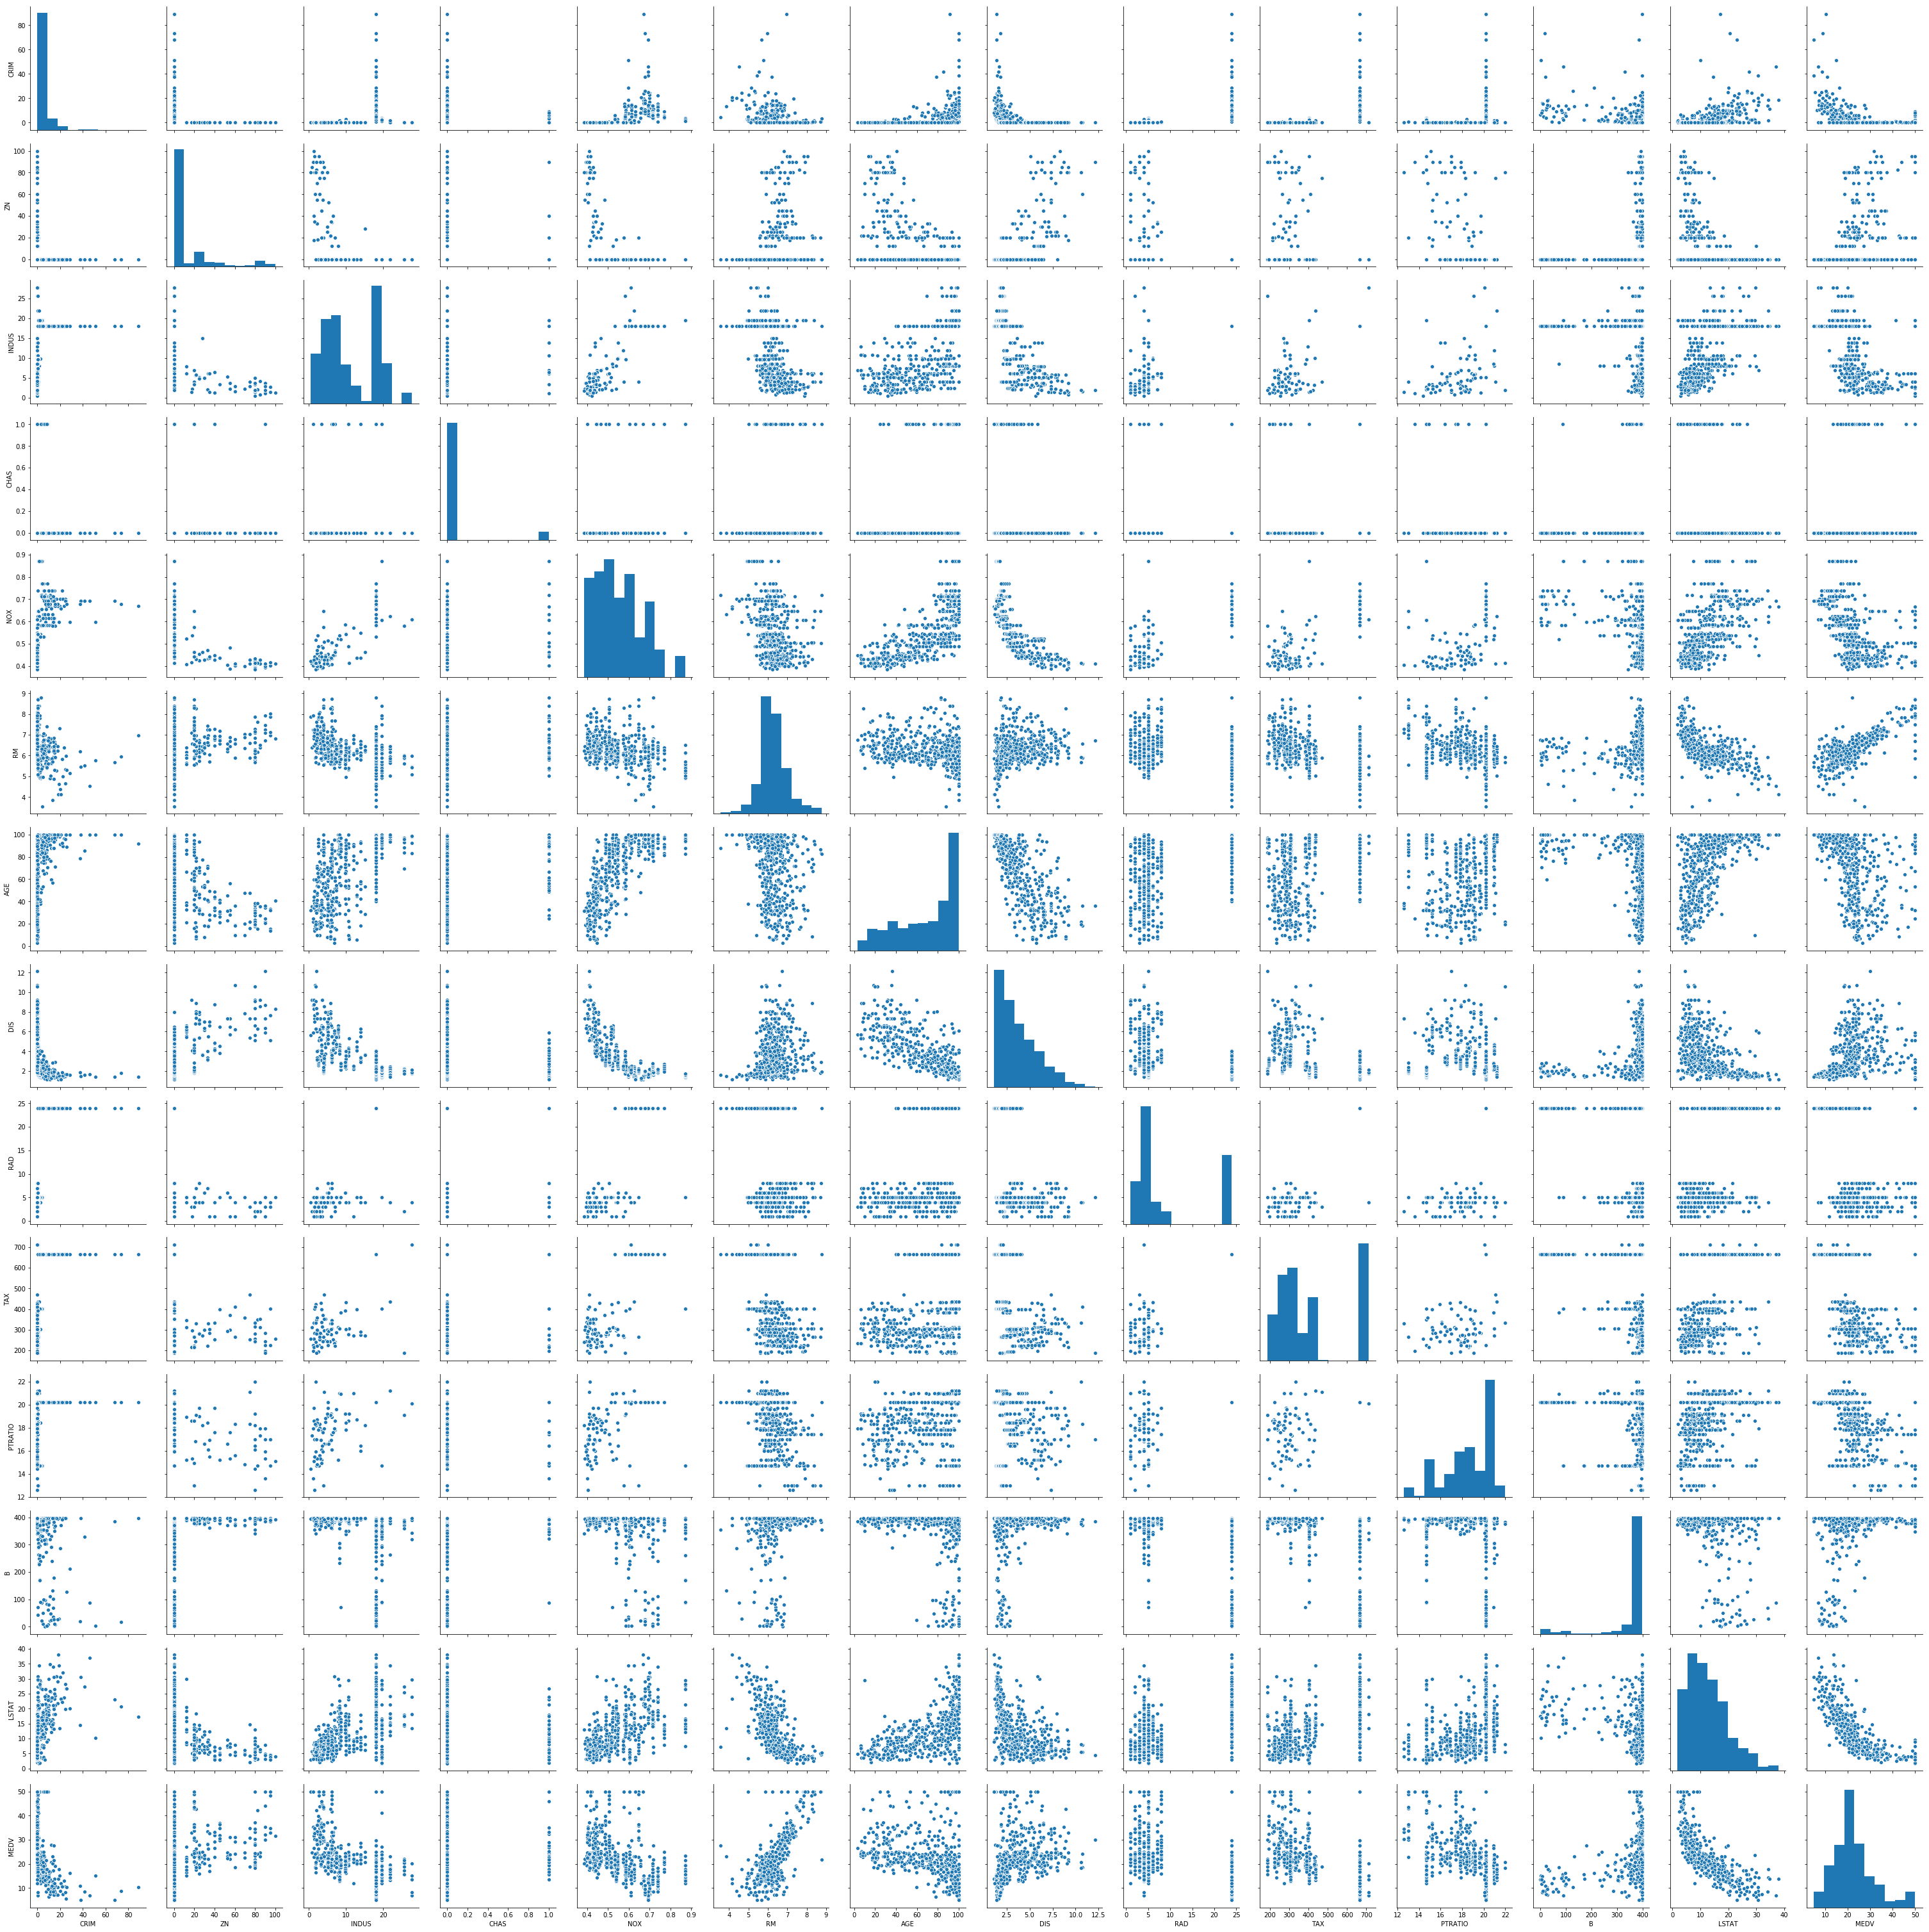

In [43]:
sns.pairplot(full_data,height=3)

In [44]:
# Basic exploratory analyses 
print("Rows,Columns:",df.shape)
df.describe()

Rows,Columns: (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [14]:
# split dataset into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(df, target, test_size=0.30)


In [15]:
# Fitting using stats model
model_1 = smf.OLS(Y_train,X_train).fit()
prediction_1 = model_1.predict(X_train) # predict y_train values
prediction_2 = model_1.predict(X_test)# predict y_test values

In [16]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     516.6
Date:                Tue, 04 Sep 2018   Prob (F-statistic):          2.47e-215
Time:                        14:28:41   Log-Likelihood:                -1089.9
No. Observations:                 354   AIC:                             2206.
Df Residuals:                     341   BIC:                             2256.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0404      0.046     -0.873      0.383      -0.132       0.051
ZN             0.0616      0.021      2.998      0.003       0.021       0.102
INDUS          0.0124      0.086      0.144      0.885      -0.156       0.181
CHAS           3.2689      1.105      2.960      0.003       1.096       5.441
NOX           -2.2735      4.120     -0.552      0.581     -10.378       5.831
RM             5.5006      0.388     14.192      0.000       4.738       6.263
AGE            0.0114      0.018      0.638      0.524      -0.024       0.046
DIS           -0.9151      0.262     -3.496      0.001      -1.430      -0.400
RAD            0.1149      0.094      1.229      0.220      -0.069       0.299
TAX           -0.0083      0.006     -1.453      0.147      -0.020       0.003
PTRATIO       -0.2944      0.141     -2.096      0.037      -0.571      -0.018
B              0.0140      0.003      4.007      0.000       0.007       0.021
LSTAT         -0.5045      0.062     -8.080      0.000      -0.627      -0.382
==============================================================================
Omnibus:                      138.095   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              773.964
Skew:                           1.542   Prob(JB):                    8.63e-169
Kurtosis:                       9.555   Cond. No.                     8.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Looking at the Summary

In the summary we see some interesting results. The INDUS coefficient (proportion of non-retail business acres per town) is not nearly statistically significant at the 5% or 10% level. The same goes for the AGE and NOX variables.

There seems to be no autocorrelation (as expected as this is not a time-series problem).

Overall, the Adjusted R^2 score is great, but how about RMSE (root mean square error), lets have a loo

In [17]:
rmse_training = sqrt(mean_squared_error(Y_train, prediction_1))
print("RMSE for training data:", rmse_training)
rmse_test = sqrt(mean_squared_error(Y_test,prediction_2))
print("RMSE for test data:", rmse_test)

RMSE for training data: 5.258912374763052
RMSE for test data: 4.151822973549412


## Checking for Multicollinearity (Assumption #3)

In [18]:
corr = df.corr()


Hmm... The RMSE for the test data is quite low and very close to that of the training data. But can we do better?! Lets try by doing a correlation test to identify spurious variables. **A VIF Test.**

In [19]:
vif = pd.DataFrame() # create empty dataframe
vif["VIF Factor"] = [variance_inflation_factor(X_test.values, i) for i in range(X_test.shape[1])]
vif["features"] = X_test.columns
vif

,VIF Factor,features
0,1.918036,CRIM
1,3.143581,ZN
2,12.608169,INDUS
3,1.080738,CHAS
4,104.006995,NOX
5,101.730031,RM
6,21.496234,AGE
7,14.792989,DIS
8,11.266321,RAD
9,38.554621,TAX


There is no hard and fast rules on VIF factors, while a score above 10 is undesirable as it suggests very correlation that artificially inflates our R score, a subjective call must be taken depending on the problem. For example, while the TAX variable (full-value property-tax rate per 10,000 dollars) is highly correlated with the rest of the variables, it is too important of a variable to ignore, plus it is very significant at the 5% level.

NOX and INDUS on the other hand, we can try and remove and see if we get a better model. Let's re-create our training sets.

In [20]:
df_no_rm = df.copy()

In [28]:

#create second training set
df_no_rm = df_no_rm.drop(["NOX"], axis = 1)
X_train_no_rm, X_test_no_rm, Y_train, Y_test = train_test_split(df_no_rm, target, test_size=0.30)
print(df.shape)
print(X_test_no_rm.shape)

(506, 13)
(152, 11)


In [29]:
# fit second model
model_2 = smf.OLS(Y_train,X_train_no_rm).fit()
prediction_3 = model_2.predict(X_train_no_rm)# predict y_test values
prediction_4 = model_2.predict(X_test_no_rm)# predict y_test values


In [30]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     729.7
Date:                Tue, 04 Sep 2018   Prob (F-statistic):          2.20e-230
Time:                        14:29:18   Log-Likelihood:                -1063.6
No. Observations:                 354   AIC:                             2149.
Df Residuals:                     343   BIC:                             2192.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0976      0.041     -2.393      0.017      -0.178      -0.017
ZN             0.0722      0.016      4.382      0.000       0.040       0.105
INDUS         -0.0520      0.071     -0.733      0.464      -0.191       0.087
CHAS           5.3039      1.106      4.796      0.000       3.129       7.479
RM             4.8453      0.262     18.489      0.000       4.330       5.361
AGE           -0.0020      0.015     -0.126      0.899      -0.032       0.028
DIS           -1.2196      0.213     -5.727      0.000      -1.638      -0.801
RAD            0.1926      0.080      2.421      0.016       0.036       0.349
TAX           -0.0100      0.005     -2.202      0.028      -0.019      -0.001
B              0.0170      0.003      5.939      0.000       0.011       0.023
LSTAT         -0.5514      0.053    -10.440      0.000      -0.655      -0.447
==============================================================================
Omnibus:                      126.274   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              486.955
Skew:                           1.533   Prob(JB):                    1.82e-106
Kurtosis:                       7.859   Cond. No.                     2.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
rmse_training_2 = sqrt(mean_squared_error(Y_train, prediction_3))
print("RMSE for training data:", rmse_training_2)
rmse_test_2 = sqrt(mean_squared_error(Y_test,prediction_4))
print("RMSE for test data:", rmse_test_2)

RMSE for training data: 4.881450477315991
RMSE for test data: 5.46586301319395


Looks like dropping this variable  caused the model to improve a little!. 

In [32]:
lm = linear_model.LinearRegression()
model_2 = lm.fit(X_train,Y_train)

In [26]:
import numpy as np
prediction_2 = np.asarray(prediction_2)
prediction_2 = prediction_2.reshape(-1,1)
prediction_2.shape

(152, 1)

In [27]:
prediction_2_array = np.asarray(prediction_2)
prediction_2_array = prediction_2_array.flatten()
prediction_2_array.shape

(152,)

# Testing for Non-Linearity: Residual Plot

(152, 1)
(152, 1)
(152,)


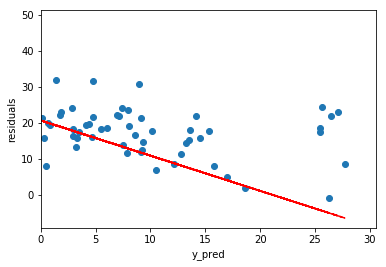

In [102]:

residual = Y_test.values-prediction_2
residual_array = np.asarray(residual)
residual_array = residual_array.flatten()



plt.scatter(y=prediction_2,x=residual)
plt.xlim(0,)
plt.xlabel("y_pred")
plt.ylabel("residuals")

#calculate trendline
z = np.polyfit(prediction_2_array,residual_array, 1)
p = np.poly1d(z)
plt.plot(residual_array,p(residual_array),"r--")
plt.show()


There appears to be some trend in the residual plot, non-linearity needs to be explored for each variable

## Test for Heteroskedacticity (Breush-Pagan)

Here we are testing for non-constant variance for our error.This violation is most common in cross=sectional data, rarely occuring on purely time-series data.  The example that I had given in class was of comparing state expenditures on Education. So, here MP and UP were large states and chandigah and J&K were small states so we had a non-constant variance of our error terms. One remedy would be to split the states by population and have seperate regressions for states over 10 crore indivuduals and less than 10 crore. 

The breusch pagan test is a hypothesis test, where our Null is that variance is constant and alternative is that variance is non-constant. Therefore our decision hinges on a p-value. 

In [22]:
import statsmodels

name = [ 'p-value']
test = statsmodels.stats.diagnostic.het_breuschpagan(model_1.resid, model_1.model.exog)
lzip(name, test)

[('p-value', 73.91031062416761)]

Here, we cannot reject the null. We are safe from this potential violation.